In [1]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tqdm
import seaborn as sns

In [2]:
input_video = "D01_20231122162828.mp4"
cap = cv2.VideoCapture(input_video)  
fps = cap.get(cv2.CAP_PROP_FPS)
W = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
H = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_number_of_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(W,H,fps,total_number_of_frames)

3840 2160 20.0 1954


In [1]:
org_frame = []
of_frame = []
org_of = []
norm_l2_list = []
cap = cv2.VideoCapture('D01_20231122162828.mp4')
ret, frame1 = cap.read()
# Resize the frame to ***720x1280***
frame1 = cv2.resize(frame1, (1280, 720))
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[..., 1] = 255
while(1):
    ret, frame2 = cap.read()
    if not ret:
        break
    # Resize the frame to 720x1280
    frame2 = cv2.resize(frame2, (1280, 720))
    
    # Convert next frame to Grayscale
    next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    
    flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5,  2, 13, 3, 7, 1.2, 0)
    
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    hsv[..., 0] = ang*180/np.pi/2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    of_or = np.concatenate((frame2, 255-bgr), axis=1)
    
    # calculate norm of velocity vector
    x_comp = flow[...,0]
    y_comp = flow[...,1]
    norm_l2 = np.sqrt(x_comp**2 + y_comp**2) #/np.max(np.sqrt(x_comp**2 + y_comp**2))
    norm_l2_list.append(norm_l2)
    
    org_frame.append(frame2)
    of_frame.append(255-bgr)
    org_of.append(of_or)
    
    if len(org_frame)%500 == 0:
        print(500)
        
#     cv2.imshow('frame2', cv2.resize(of_or, (1280, 360)))
#     cv2.imshow('frame2', 255 - bgr)
#     k = cv2.waitKey(30) & 0xff
#     if k == 27:
#         break
    
    prvs = next
# cv2.destroyAllWindows()
print('Done')

In [80]:
flow[0,0]

array([2.9610194e-06, 2.4446938e-06], dtype=float32)

In [79]:
flow[0,1]

array([ 1.9174696e-07, -1.0169807e-08], dtype=float32)

## Calculate Velocity Magnitude and plot as a Heatmap

In [12]:
def velocity_magnitude_calc(video_path):

    norm_l2_list = []
    
    cap = cv2.VideoCapture(video_path)
    ret, frame1 = cap.read()
    
    # Resize the frame to ***720x1280***
    frame1 = cv2.resize(frame1, (1280, 720))
    prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)

    frame_counter = 1
    
    while(True):
        
        ret, frame2 = cap.read()
        if not ret:
             break
        
        # Resize the frame to 720x1280
        frame2 = cv2.resize(frame2, (1280, 720))

        # Convert next frame to Grayscale
        next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

        flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5,  2, 13, 3, 7, 1.2, 0)

        # calculate norm of velocity vector
        x_comp = flow[...,0]
        y_comp = flow[...,1]
        norm_l2 = np.sqrt(x_comp**2 + y_comp**2) #/np.max(np.sqrt(x_comp**2 + y_comp**2))
        norm_l2_list.append(norm_l2)
        
        frame_counter +=1

        if frame_counter%500 == 0:
            print(500)
            
        prvs = next

    print('Done')
    
    return norm_l2_list

In [13]:
velocity_mag_list = velocity_magnitude_calc('D01_20231122162828.mp4')

500
500
500
Done


1951
(720, 1280)
Avg: 0.02121481
Max: 2.6838484
Min: 1.0346792e-16


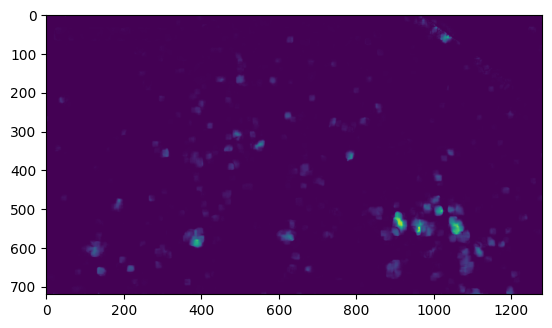

In [61]:
# plot norms as a heatmap
plt.imshow(velocity_mag_list[0])

print(len(velocity_mag_list))
print(velocity_mag_list[0].shape)
print('Avg:',velocity_mag_list[0].mean())
print('Max:',velocity_mag_list[0].max())
print('Min:',velocity_mag_list[0].min())

In [62]:
mean_values = []
for mag in velocity_mag_list:
    mean_values.append(mag.mean())


In [63]:
print(len(mean_values))

1951


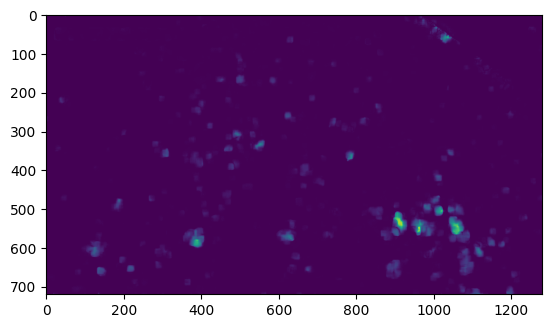

In [64]:
normal = -(velocity_mag_list[0] - velocity_mag_list[0].max())/(velocity_mag_list[0].min() - velocity_mag_list[0].max())
plt.imshow(normal)


### --------------------------------------------------------------------------------------------------------------------------------------------------------

## Calculate Velocity Magnitude in Grids

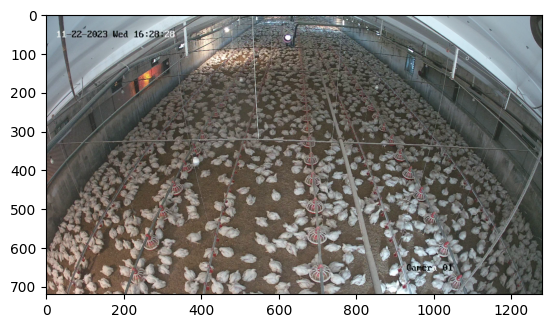

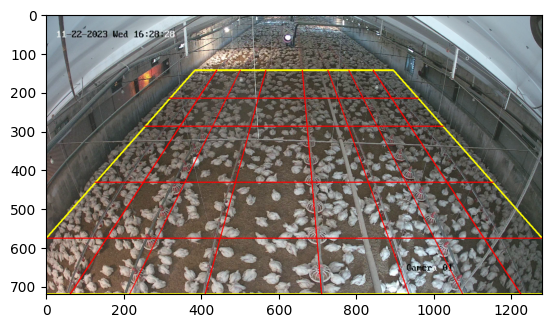

In [170]:
# Make Grides
# Select a sample image
cap = cv2.VideoCapture('D01_20231122162828.mp4')
ret, sample_frame = cap.read()
sample_frame = cv2.resize(sample_frame, (1280, 720))
sample_frame = cv2.cvtColor(sample_frame, cv2.COLOR_BGR2RGB)
plt.imshow(sample_frame)
plt.show()


# Get the dimensions of the image
height, width, _ = sample_frame.shape

# Top boundery
cv2.line(sample_frame, (384, 144), (896, 144), (255, 255, 0), 3)
# Bottom boundry
cv2.line(sample_frame, (0, 720), (1280, 720), (255, 255, 0), 4)

# Left boundery
cv2.line(sample_frame, (384, 144), (0, 576), (255, 255, 0), 3)
# Right boundry
cv2.line(sample_frame, (896, 144), (1280, 576), (255, 255, 0), 3)


# Coordinates: (1225, 688)
# Coordinates: (1075, 688)
# Coordinates: (936, 688)
# Coordinates: (711, 688)
# Coordinates: (410, 688)
# Coordinates: (215, 688)
# Coordinates: (62, 688)
###########################
# Coordinates: (844, 144)
# Coordinates: (781, 144)
# Coordinates: (727, 144)
# Coordinates: (661, 144)
# Coordinates: (567, 144)
# Coordinates: (501, 144)
# Coordinates: (440, 144)

# Draw vertical lines
cv2.line(sample_frame, (1225, 720), (844, 144), (255, 0, 0), 2)
cv2.line(sample_frame, (1075, 720), (781, 144), (255, 0, 0), 2)
cv2.line(sample_frame, (936, 720), (727, 144), (255, 0, 0), 2)
cv2.line(sample_frame, (711, 720), (661, 144), (255, 0, 0), 2)
cv2.line(sample_frame, (410, 720), (567, 144), (255, 0, 0), 2)
cv2.line(sample_frame, (215, 720), (501, 144), (255, 0, 0), 2)
cv2.line(sample_frame, (62, 720), (440, 144), (255, 0, 0), 2)


# Draw horizental lines
cv2.line(sample_frame, (317, 144+72), (960, 144+72), (255, 0, 0), 2)
cv2.line(sample_frame, (254, 576-144-144), (1025, 576-144-144), (255, 0, 0), 2)
cv2.line(sample_frame, (126, 576-144), (1154, 576-144), (255, 0, 0), 2)
cv2.line(sample_frame, (0, 576), (1280, 576), (255, 0, 0), 2)


# Display the image with grid lines
cv2.imshow('Image with Grid', sample_frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('gridsample.jpeg', cv2.cvtColor(sample_frame, cv2.COLOR_BGR2RGB))
plt.imshow(sample_frame)

In [286]:
def make_grid(sample_frame):
    sample_frame = cv2.resize(sample_frame, (1280, 720))
    sample_frame = cv2.cvtColor(sample_frame, cv2.COLOR_BGR2RGB)



    # Get the dimensions of the image
    height, width, _ = sample_frame.shape

    # Top boundery
    cv2.line(sample_frame, (384, 144), (896, 144), (255, 255, 0), 3)
    # Bottom boundry
    cv2.line(sample_frame, (0, 720), (1280, 720), (255, 255, 0), 4)

    # Left boundery
    cv2.line(sample_frame, (384, 144), (0, 576), (255, 255, 0), 3)
    # Right boundry
    cv2.line(sample_frame, (896, 144), (1280, 576), (255, 255, 0), 3)



    # Draw vertical lines
    cv2.line(sample_frame, (1225, 720), (844, 144), (255, 0, 0), 2)
    cv2.line(sample_frame, (1075, 720), (781, 144), (255, 0, 0), 2)
    cv2.line(sample_frame, (936, 720), (727, 144), (255, 0, 0), 2)
    cv2.line(sample_frame, (711, 720), (661, 144), (255, 0, 0), 2)
    cv2.line(sample_frame, (410, 720), (567, 144), (255, 0, 0), 2)
    cv2.line(sample_frame, (215, 720), (501, 144), (255, 0, 0), 2)
    cv2.line(sample_frame, (62, 720), (440, 144), (255, 0, 0), 2)


    # Draw horizental lines
    cv2.line(sample_frame, (317, 144+72), (960, 144+72), (255, 0, 0), 2)
    cv2.line(sample_frame, (254, 576-144-144), (1025, 576-144-144), (255, 0, 0), 2)
    cv2.line(sample_frame, (126, 576-144), (1154, 576-144), (255, 0, 0), 2)
    cv2.line(sample_frame, (0, 576), (1280, 576), (255, 0, 0), 2)
    
    return sample_frame

In [258]:
# Define a callback function that will be called when the mouse is clicked
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f"({x}, {y}),")
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(sample_frame, f"({x}, {y})", (x, y), font, 0.2, (0, 255, 0), 1, cv2.LINE_AA)
        cv2.imshow("Image", sample_frame)

sample_frame = cv2.imread('gridsample.jpeg')
sample_frame = cv2.resize(image, (1280, 720))
sample_frame = cv2.cvtColor(sample_frame, cv2.COLOR_BGR2RGB)

# Display the image in a window
cv2.imshow("Image", sample_frame)
# Set the mouse callback function to get coordinates on click
cv2.setMouseCallback("Image", click_event)
# Wait for a key press and close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

(1, 574),
(154, 575),
(83, 688),
(3, 687),


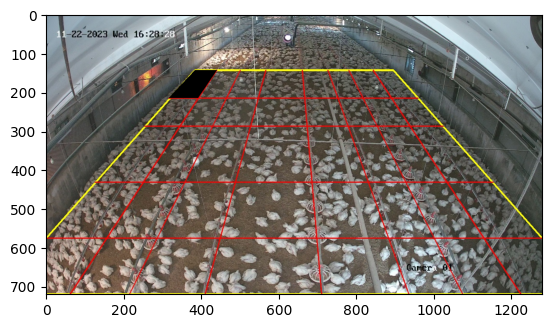

In [295]:
image = cv2.imread('gridsample.jpeg')
image = cv2.resize(image, (1280, 720))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Define the four points of the grids
R1 = [(384, 144),(440, 144),(392, 215),(317, 215)]
R2 = [(439, 144),(499, 144),(466, 216),(390, 215)]
R3 = [(500, 143),(567, 143),(547, 216),(465, 215)]  
R4 = [(567, 144),(662, 144),(668, 216),(545, 216)]
R5 = [(662, 145),(729, 143),(754, 215),(667, 216)]
R6 = [(728, 144),(782, 144),(817, 215),(754, 216)]    
R7 = [(781, 143),(845, 144),(892, 214),(818, 216)]   
R8 = [(843, 144),(896, 142),(960, 215),(893, 216)]
    
R9 = [(322, 215),(392, 215),(345, 287),(256, 288),]
R10 = [(391, 216),(464, 216),(429, 288),(344, 287),]
R11 = [(463, 216),(547, 215),(527, 288),(429, 287),]
R12 = [(546, 216),(667, 214),(673, 287),(528, 288),]
R13 = [(667, 216),(754, 216),(779, 287),(674, 287),]
R14 = [(755, 216),(816, 216),(855, 287),(780, 288),]
R15 = [(818, 215),(891, 215),(939, 287),(854, 287),]
R16 = [(891, 216),(959, 216),(1023, 287),(940, 288),]

R17 = [(255, 289),(344, 287),(250, 432),(127, 431),]
R18 = [(343, 287),(429, 287),(358, 432),(250, 431),]
R19 = [(429, 287),(527, 287),(488, 432),(359, 431),]
R20 = [(528, 288),(673, 288),(687, 432),(487, 433),]
R21 = [(674, 287),(780, 288),(832, 433),(686, 431),]
R22 = [(779, 288),(854, 288),(926, 432),(830, 431),]
R23 = [(854, 288),(938, 287),(1033, 431),(928, 432),]
R24 = [(940, 288),(1024, 287),(1152, 431),(1035, 431),]


R25 = [(129, 432),(251, 431),(156, 576),(3, 576),]
R26 = [(250, 432),(358, 432),(287, 576),(156, 576),]
R27 = [(359, 432),(488, 432),(447, 577),(286, 577),]
R28 = [(487, 433),(686, 432),(698, 576),(449, 576),]
R29 = [(686, 433),(832, 432),(883, 577),(698, 577),]
R30 = [(833, 433),(928, 432),(1002, 577),(884, 577),]
R31 = [(928, 432),(1035, 432),(1130, 577),(1002, 577),]
R32 = [(1035, 431),(1152, 432),(1276, 575),(1129, 576),]
        

R33=[(0, 575),(155, 576),(60, 720),(3, 720),]
R34=[(156, 576),(284, 576),(210, 720),(59, 720),]
R35=[(286, 575),(448, 576),(408, 720),(219, 720),]
R36=[(448, 576),(699, 577),(703, 720),(410, 720),]
R37=[(699, 576),(883, 575),(930, 720),(715, 720),]
R38=[(885, 576),(1003, 575),(1080, 720),(920, 720),]
R39=[(1003, 577),(1131, 576),(1220, 720),(1080, 720),]
R40=[(1131, 576),(1278, 574),(1278, 720),(1200, 720),]



points = np.array(R1)

# Create a mask for the grid region
mask = np.ones(image.shape[:2], dtype=np.uint8)
cv2.fillPoly(mask, [points], 0)

# Apply the mask to the image
masked_image = cv2.bitwise_and(image, image, mask=mask)
plt.imshow(masked_image)
plt.show()

In [296]:
regions = [R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,
           R11,R12,R13,R14,R15,R16,R17,R18,R19,R20,
           R21,R22,R23,R24,R25,R26,R27,R28,R29,R30,
          R31,R32,R33,R34,R35,R36,R37,R38,R39,R40]

In [265]:
# Calculate velocity in grids
# This function return average velocity in a given regoin
def velocity_in_grids(region, of_normL2_frame):
    
    image = of_normL2_frame
    
    # Create a mask for the grid region
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    
    points = np.array(region)
    cv2.fillPoly(mask, [points], 255)
    
    # Calculate the average pixel values within the grid
    mean_val = cv2.mean(image, mask=mask)
    
    return mean_val[0]

In [268]:
# Save velocities of each frame - each frame has 40 regions

regions = [R1,R2,R3,R4,R5,R6,R7,R8,R9,R10,
           R11,R12,R13,R14,R15,R16,R17,R18,R19,R20,
           R21,R22,R23,R24,R25,R26,R27,R28,R29,R30,
          R31,R32,R33,R34,R35,R36,R37,R38,R39,R40]

avg_velocities_ingrids = []

for frame in velocity_mag_list:
    avg_vals = []
    for r in regions:
        avg_vals.append(velocity_in_grids(r, frame))  
    avg_velocities_ingrids.append(avg_vals)
    
    
print(np.array(avg_velocities_ingrids).shape)

(1951, 40)


In [279]:
avg_velocities_ingrids[0]

[0.007483678452418173,
 0.0171654546139137,
 0.03454451215432068,
 0.010519318806276575,
 0.006818498219551378,
 0.007942269142830005,
 0.006591454844633703,
 0.0022711800100193645,
 0.004022056627600256,
 0.028610932226723427,
 0.006897797982325346,
 0.019418161373823645,
 0.018813464624811354,
 0.018250671537724493,
 0.014577127135526322,
 0.0010400377166076248,
 0.004699479319299382,
 0.02202613841869268,
 0.042421030200694244,
 0.02392526862486285,
 0.020179869692908862,
 0.0021887178804814006,
 0.015233976886325223,
 0.010308227962570238,
 0.010853732607925218,
 0.004266834729546835,
 0.03408689918040472,
 0.017669716033385196,
 0.016451723369853868,
 0.2040892170171232,
 0.19591981565038735,
 0.007129904543223237,
 0.030183417365382496,
 0.029668918617894727,
 0.04036892573714441,
 0.009614714913160122,
 0.01519129821598969,
 0.023114160524533127,
 0.07992853923843748,
 0.023787619390961495]

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## Calculate Base Values in Grids for Normalization

In [272]:
# Average the values of velocities_dict
base_values =  np.mean(np.array(avg_velocities_ingrids),axis=0)
base_values.shape

(40,)

In [280]:
# Normalize the velocites
normalized_velocities_ingrids = []
for i in range(1951):
    
    # A array with 40 element : single_frame_normalized_velocities_ingrids
    single_frame_normalized_velocities_ingrids = np.array(avg_velocities_ingrids)[i,:] / base_values
    
    normalized_velocities_ingrids.append(single_frame_normalized_velocities_ingrids)
    
np.array(normalized_velocities_ingrids).shape

(1951, 40)

In [307]:
# Show a Sample frame with percentage of velocites in each frame
# Select a sample image
cap = cv2.VideoCapture('D01_20231122162828.mp4')
ret, frame = cap.read()

# Gride a frame and return in RGB
grided_frame = make_grid(frame)

# get the 40 corresponding values
frame_normalized_velocities_ingrids = normalized_velocities_ingrids[0]

# plot velocity percentage on the frame
font = cv2.FONT_HERSHEY_SIMPLEX

for i in range(40):
    
    pecentage  = np.round(frame_normalized_velocities_ingrids[i] *100,1)
    reg = regions[i]
    
    x = int(np.mean(np.array(reg)[:,0]))
    y = int(np.mean(np.array(reg)[:,1]))
    
    cv2.putText(grided_frame, f'{pecentage}%', (x, y), font, 0.5, (0, 255, 0), 1, cv2.LINE_AA)

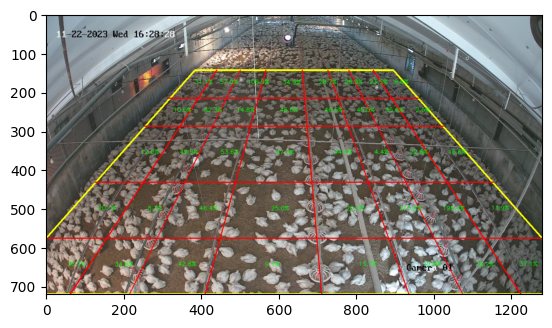

In [308]:
# Display the final frame
cv2.imshow('final frame', cv2.cvtColor(grided_frame, cv2.COLOR_BGR2RGB))
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('Final.jpeg', cv2.cvtColor(grided_frame, cv2.COLOR_BGR2RGB))
plt.imshow(grided_frame)
plt.show()

### -----------------------------------------------------------------------------------------------------------------------------------------------------------

## Visualize the Velocity Percentage in Grides

In [313]:
# Run the above codes on a complete video and save the final result( plot the grids and percentage on video frames!)

cap = cv2.VideoCapture('D01_20231122162828.mp4')
final_frames = []

for f in range(1951):
    
    ret, frame = cap.read()
    # Gride a frame and return in RGB
    grided_frame = make_grid(frame)
    # get the 40 corresponding values
    frame_normalized_velocities_ingrids = normalized_velocities_ingrids[f]

    # plot velocity percentage on the frame
    for i in range(40):

        pecentage  = np.round(frame_normalized_velocities_ingrids[i] *100,1)
        reg = regions[i]
        x = int(np.mean(np.array(reg)[:,0]))
        y = int(np.mean(np.array(reg)[:,1]))
        font = cv2.FONT_HERSHEY_SIMPLEX
        cv2.putText(grided_frame, f'{pecentage}%', (x, y), font, 0.5, (0, 255, 0), 1, cv2.LINE_AA)
        
    if f%500==0:
        print(i)
    
    final_frames.append(cv2.cvtColor(grided_frame, cv2.COLOR_BGR2RGB))
    

print('Done!')

39
39
39
39
Done!


In [314]:
# make final video
def create_video_from_frames(frames, output_path, fps, codec='XVID'):
    # Get the dimensions of the frames
    height, width, layers = frames[0].shape

    # Define the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*codec)
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    for frame in frames:
        out.write(frame)

    # Release
    out.release()
    print(f"Video saved to {output_path}")

In [315]:
output_path = 'final_video.avi'

# Create video from frames
create_video_from_frames(final_frames, output_path, 20)

Video saved to final_video.avi


### ---------------------------------------------------------------------------------------------------------------------------------------------------------

In [117]:
# This section makes a video from frames

output_video = "heatmap.mp4"
fourcc = cv2.VideoWriter_fourcc(*'DVID')
W = 1280
H = 720
out = cv2.VideoWriter(output_video, fourcc, fps, (W, H)) 
temp = np.zeros((720,1280,3))
for i in tqdm.tqdm(range(len(norm_l2_list))):

    temp[...,0] = norm_l2_list[i]
    temp[...,1] = norm_l2_list[i]
    temp[...,2] = norm_l2_list[i]

    out.write(temp*255/temp.max())
    
    if i%500 == 0:
        print(i)  
        
out.release()

  0%|▏                                                                                | 4/1951 [00:00<01:47, 18.07it/s]

0


 26%|████████████████████▎                                                          | 502/1951 [00:31<01:37, 14.79it/s]

500


 51%|████████████████████████████████████████▏                                     | 1004/1951 [01:02<00:50, 18.70it/s]

1000


 77%|████████████████████████████████████████████████████████████                  | 1503/1951 [01:30<00:26, 16.92it/s]

1500


100%|██████████████████████████████████████████████████████████████████████████████| 1951/1951 [01:49<00:00, 17.79it/s]


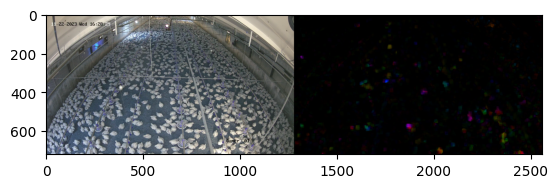

In [19]:
plt.imshow(np.concatenate((frame2, bgr), axis=1))
cv2.imshow('frame2', cv2.resize(np.concatenate((frame2, bgr), axis=1), (1280, 360)))
k = cv2.waitKey(10000)
cv2.destroyAllWindows()